In [1]:
import numpy as np
import pandas as pd
import torch
import torchvision
from torchvision.transforms import transforms
import torch.nn as nn
import os
import glob
from torch.utils.data import DataLoader
from torch.optim import Adam
from PIL import Image

In [2]:
pred="C:\\Users\\navee\\OneDrive\\Desktop\\concrete\\pred"

In [3]:
#neuralNetwork


class NeuralNetwork(nn.Module):
    
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        
        self.conv1=nn.Conv2d(in_channels=3,out_channels=12,kernel_size=3,stride=1,padding=1)
        #Shape= (256,12,150,150)
        self.bn1=nn.BatchNorm2d(num_features=12)
        #Shape= (256,12,150,150)
        self.relu1=nn.ReLU()
        #Shape= (256,12,150,150)
        
        self.pool=nn.MaxPool2d(kernel_size=2)
        #Reduce the image size be factor 2
        #Shape= (256,12,75,75)
        
        
        self.conv2=nn.Conv2d(in_channels=12,out_channels=20,kernel_size=3,stride=1,padding=1)
        #Shape= (256,20,75,75)
        self.relu2=nn.ReLU()
        #Shape= (256,20,75,75)
        
        
        
        self.conv3=nn.Conv2d(in_channels=20,out_channels=32,kernel_size=3,stride=1,padding=1)
        #Shape= (256,32,75,75)
        self.bn3=nn.BatchNorm2d(num_features=32)
        #Shape= (256,32,75,75)
        self.relu3=nn.ReLU()
        #Shape= (256,32,75,75)
        
        
        self.fc=nn.Linear(in_features=75 * 75 * 32,out_features=2)
        
        
        
        #Feed forwad function
        
    def forward(self,input):

        output=self.conv1(input)
        output=self.bn1(output)
        output=self.relu1(output)
            
        output=self.pool(output)
            
        output=self.conv2(output)
        output=self.relu2(output)
            
        output=self.conv3(output)
        output=self.bn3(output)
        output=self.relu3(output)
            
            
            #Above output will be in matrix form, with shape (256,32,75,75)
            
        output=output.view(-1,32*75*75)
            
            
        output=self.fc(output)
            
        return output
        
        
        
        

In [4]:
checkpoint=torch.load("best_checkpoint.model")
model=NeuralNetwork()
model.load_state_dict(checkpoint)
model.eval()

NeuralNetwork(
  (conv1): Conv2d(3, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU()
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(12, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU()
  (conv3): Conv2d(20, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu3): ReLU()
  (fc): Linear(in_features=180000, out_features=2, bias=True)
)

In [5]:
Transform= transforms.Compose([transforms.Resize((150,150)),transforms.ToTensor(),transforms.Normalize([0.5,0.5,0.5]
                                                  ,[0.5,0.5,0.5])
                              ])

In [6]:
classess= ['negative','positive']

In [7]:
def prediction(img_path, transformer):
    image= Image.open(img_path)
    image_tensor=transformer(image).float()
    
    image_tensor=image_tensor.unsqueeze_(0)
    
    input=image_tensor
    
    output=model(input)
    
    index= output.data.numpy().argmax()
    
    pred=classess[index]
    
    return pred
    
    

In [8]:
images_path=glob.glob(pred+'/*.jpg')

In [9]:
pred_dict={}

for i in images_path:
    pred_dict[i[i.rfind('/')+1:]]=prediction(i,Transform)

C:\Users\navee\anaconda3\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [10]:
pred_dict

{'C:\\Users\\navee\\OneDrive\\Desktop\\concrete\\pred\\00001.jpg': 'negative',
 'C:\\Users\\navee\\OneDrive\\Desktop\\concrete\\pred\\00002.jpg': 'negative',
 'C:\\Users\\navee\\OneDrive\\Desktop\\concrete\\pred\\00003.jpg': 'negative',
 'C:\\Users\\navee\\OneDrive\\Desktop\\concrete\\pred\\00004.jpg': 'negative',
 'C:\\Users\\navee\\OneDrive\\Desktop\\concrete\\pred\\00005.jpg': 'negative',
 'C:\\Users\\navee\\OneDrive\\Desktop\\concrete\\pred\\00006.jpg': 'negative',
 'C:\\Users\\navee\\OneDrive\\Desktop\\concrete\\pred\\00007.jpg': 'negative',
 'C:\\Users\\navee\\OneDrive\\Desktop\\concrete\\pred\\00008.jpg': 'negative',
 'C:\\Users\\navee\\OneDrive\\Desktop\\concrete\\pred\\00009.jpg': 'negative',
 'C:\\Users\\navee\\OneDrive\\Desktop\\concrete\\pred\\00010.jpg': 'negative',
 'C:\\Users\\navee\\OneDrive\\Desktop\\concrete\\pred\\00011.jpg': 'negative',
 'C:\\Users\\navee\\OneDrive\\Desktop\\concrete\\pred\\00012.jpg': 'negative',
 'C:\\Users\\navee\\OneDrive\\Desktop\\concrete\\pre

In [15]:
length= len(glob.glob(pred+'*/*.jpg'))

In [17]:
images_path

['C:\\Users\\navee\\OneDrive\\Desktop\\concrete\\pred\\00001.jpg',
 'C:\\Users\\navee\\OneDrive\\Desktop\\concrete\\pred\\00002.jpg',
 'C:\\Users\\navee\\OneDrive\\Desktop\\concrete\\pred\\00003.jpg',
 'C:\\Users\\navee\\OneDrive\\Desktop\\concrete\\pred\\00004.jpg',
 'C:\\Users\\navee\\OneDrive\\Desktop\\concrete\\pred\\00005.jpg',
 'C:\\Users\\navee\\OneDrive\\Desktop\\concrete\\pred\\00006.jpg',
 'C:\\Users\\navee\\OneDrive\\Desktop\\concrete\\pred\\00007.jpg',
 'C:\\Users\\navee\\OneDrive\\Desktop\\concrete\\pred\\00008.jpg',
 'C:\\Users\\navee\\OneDrive\\Desktop\\concrete\\pred\\00009.jpg',
 'C:\\Users\\navee\\OneDrive\\Desktop\\concrete\\pred\\00010.jpg',
 'C:\\Users\\navee\\OneDrive\\Desktop\\concrete\\pred\\00011.jpg',
 'C:\\Users\\navee\\OneDrive\\Desktop\\concrete\\pred\\00012.jpg',
 'C:\\Users\\navee\\OneDrive\\Desktop\\concrete\\pred\\00013.jpg',
 'C:\\Users\\navee\\OneDrive\\Desktop\\concrete\\pred\\00014.jpg',
 'C:\\Users\\navee\\OneDrive\\Desktop\\concrete\\pred\\00015.j

In [18]:
sanjanimagae=Image.open(images_path[87])

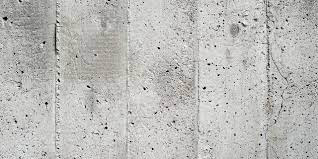

In [19]:
sanjanimagae